 # Machine Learning model

# Deep Neural Net

In [1]:
# Import  dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [3]:
# reads all columns data
all_columns_df = pd.read_csv('Resources/all_columns_df.csv')
all_columns_df.head(10)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,1998.0,Japan,31.38
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,2006.0,Japan,30.80
7,8,Tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,1989.0,Japan,30.26
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,2009.0,Japan,30.22
9,10,Minecraft,Misc,NaN,PC,Mojang,Mojang AB,10.0,NaN,2010.0,NaN,30.01


In [4]:
# Determine the number of unique values in each column.
all_columns_df.nunique()

Rank            19862
Name            13840
Genre              20
ESRB_Rating         6
Platform           40
Publisher         926
Developer_x      3185
Critic_Score       86
User_Score         44
Year               45
Country            20
Total_Sales       648
dtype: int64

In [5]:
# Drop the non-beneficial ID columns
all_columns_df.drop(['Rank', 'Name', 'Year'], axis=1, inplace=True)

In [6]:
# Look at Developer_counts value counts for binning
Developer_counts = all_columns_df['Developer_x'].value_counts()
Developer_counts

Unknown                      742
Konami                       402
Capcom                       350
EA Canada                    289
Bandai Namco Games           210
                            ... 
Separate Game Development      1
Yeti Trunk                     1
Atum Software                  1
Majesco Entertainment          1
Shockwave Productions          1
Name: Developer_x, Length: 3185, dtype: int64

<AxesSubplot:ylabel='Density'>

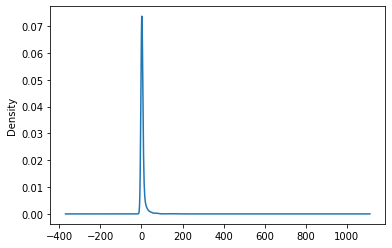

In [7]:
# Visualize the value counts
Developer_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_dev = list(Developer_counts[Developer_counts < 200].index)

# Replace in dataframe
for app in replace_dev:
    all_columns_df.Developer_x = all_columns_df.Developer_x.replace(app,"Other")
    
# Check to make sure binning was successful
all_columns_df.Developer_x.value_counts()

Other                 17867
Unknown                 742
Konami                  402
Capcom                  350
EA Canada               289
Bandai Namco Games      210
Name: Developer_x, dtype: int64

In [9]:
# Look at Publisher value counts for binning
Publisher_counts = all_columns_df['Publisher'].value_counts()
Publisher_counts

Activision         1027
Ubisoft             949
Electronic Arts     822
Konami              767
Nintendo            753
                   ... 
Dan Walters           1
Game Arts             1
ArtwareGames          1
Indie Voyage          1
GMX Media             1
Name: Publisher, Length: 926, dtype: int64

<AxesSubplot:ylabel='Density'>

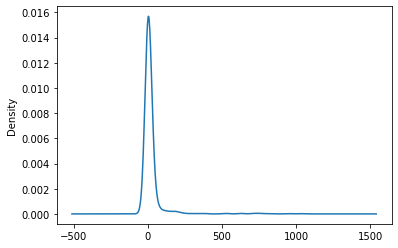

In [10]:
# Visualize the value counts
Publisher_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ...?
replace_pub = list(Publisher_counts[Publisher_counts < 700].index)

# Replace in dataframe
for app in replace_pub:
    all_columns_df.Publisher = all_columns_df.Publisher.replace(app,"Other")
    
# Check to make sure binning was successful
all_columns_df.Publisher.value_counts()

Other              14115
Activision          1027
Ubisoft              949
Electronic Arts      822
Konami               767
Nintendo             753
THQ                  718
Sega                 711
Name: Publisher, dtype: int64

In [12]:
# Look at Platform_counts value counts for binning
Platform_counts = all_columns_df['Platform'].value_counts()
Platform_counts

DS      2265
PS2     2218
PC      2142
PS3     1373
Wii     1360
PSP     1318
X360    1310
PS      1207
PS4      940
GBA      858
XB       836
PSV      645
3DS      627
GC       563
XOne     539
N64      322
NS       281
SNES     241
SAT      175
WiiU     161
2600     133
NES      102
GB        94
DC        52
GEN       31
NG        12
PSN       10
GBC        9
WS         7
XBL        7
SCD        6
3DO        4
Mob        4
VC         3
PCE        2
WW         1
GG         1
OSX        1
PCFX       1
Amig       1
Name: Platform, dtype: int64

<AxesSubplot:ylabel='Density'>

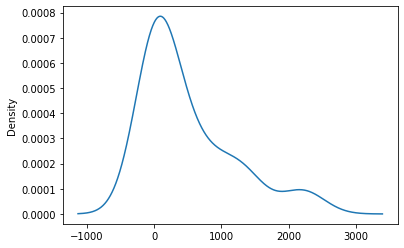

In [13]:
# Visualize the value counts
Platform_counts.plot.density()

In [14]:
# Determine which values to replace if counts are less than ...?
replace_plat = list(Platform_counts[Platform_counts < 1500].index)

# Replace in dataframe
for app in replace_plat:
    all_columns_df.Platform = all_columns_df.Platform.replace(app,"Other")
    
# Check to make sure binning was successful
all_columns_df.Platform.value_counts()

Other    13237
DS        2265
PS2       2218
PC        2142
Name: Platform, dtype: int64

In [15]:
# Look at Critic_Score value counts for binning
crit_counts = all_columns_df['Critic_Score'].value_counts()
crit_counts

8.0    231
7.0    211
7.5    183
8.3    151
7.9    149
      ... 
1.9      1
1.7      1
1.4      1
2.2      1
1.3      1
Name: Critic_Score, Length: 86, dtype: int64

In [16]:
# Determine which values to replace if counts are less than ...?
replace_crit = list(crit_counts[crit_counts < 150].index)

# Replace in dataframe
for app in replace_crit:
    all_columns_df.Critic_Score = all_columns_df.Critic_Score.replace(app,"Other")
    
# Check to make sure binning was successful
all_columns_df.Critic_Score.value_counts()

Other    3930
8.0       231
7.0       211
7.5       183
8.3       151
Name: Critic_Score, dtype: int64

In [17]:
all_columns_df.dtypes

Genre            object
ESRB_Rating      object
Platform         object
Publisher        object
Developer_x      object
Critic_Score     object
User_Score      float64
Country          object
Total_Sales     float64
dtype: object

In [18]:
all_columns_df.isna().sum()

Genre               0
ESRB_Rating      5937
Platform            0
Publisher           0
Developer_x         2
Critic_Score    15156
User_Score      19624
Country          7985
Total_Sales         0
dtype: int64

In [19]:
all_columns_df.drop('User_Score',axis=1,inplace=True)

In [20]:
all_columns_df.isna().sum()

Genre               0
ESRB_Rating      5937
Platform            0
Publisher           0
Developer_x         2
Critic_Score    15156
Country          7985
Total_Sales         0
dtype: int64

In [21]:
new_all_columns_df = all_columns_df.filter(['Genre', 'Platform', 'Publisher', 'Total_Sales'])

In [22]:
new_all_columns_df

,Genre,Platform,Publisher,Total_Sales
0,Sports,Other,Nintendo,82.86
1,Platform,Other,Nintendo,40.24
2,Racing,Other,Nintendo,37.14
3,Shooter,PC,Other,36.60
4,Sports,Other,Nintendo,33.09
...,...,...,...,...
19857,Simulation,PC,Other,0.01
19858,Shooter,PC,Ubisoft,0.01
19859,Fighting,PS2,Other,0.01
19860,Adventure,Other,Other,0.01


In [23]:
new_all_columns_df.nunique()

Genre           20
Platform         4
Publisher        8
Total_Sales    648
dtype: int64

In [27]:
cat = new_all_columns_df.select_dtypes(include='object')

In [28]:
cat=list(cat.columns)

In [29]:
cat

['Genre', 'Platform', 'Publisher']

In [30]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc_df = pd.get_dummies(data=new_all_columns_df,
    columns=cat)
# merge with main df bridge_df on key values
# all_columns_df1 = all_columns_df.join(enc_df)
# all_columns_df1.head(2)

In [31]:
num=new_all_columns_df.columns.drop(cat)

In [32]:
df=pd.concat([new_all_columns_df[num], enc_df.drop('Total_Sales',axis=1)], axis=1)

In [33]:
df.head()

,Total_Sales,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Education,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,...,Platform_PC,Platform_PS2,Publisher_Activision,Publisher_Electronic Arts,Publisher_Konami,Publisher_Nintendo,Publisher_Other,Publisher_Sega,Publisher_THQ,Publisher_Ubisoft
0,82.86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,40.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37.14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,36.60,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,33.09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
df.dropna().shape

(19862, 33)

In [35]:
df=df.dropna()

In [36]:
df.Total_Sales

0        82.86
1        40.24
2        37.14
3        36.60
4        33.09
         ...  
19857     0.01
19858     0.01
19859     0.01
19860     0.01
19861     0.01
Name: Total_Sales, Length: 19862, dtype: float64

In [37]:
y = df["Total_Sales"].values
X = df.drop(["Total_Sales"],1).values

C:\Users\ericn\AppData\Local\Temp\ipykernel_19928\2046830252.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(["Total_Sales"],1).values


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [46]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3300      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 30)                1530      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 9,911
Trainable params: 9,911
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [50]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
466/466 [==============================] - 1s 736us/step - loss: 0.3262 - accuracy: 0.0012
Epoch 2/100
466/466 [==============================] - 0s 745us/step - loss: -0.1167 - accuracy: 0.0011
Epoch 3/100
466/466 [==============================] - 0s 770us/step - loss: -0.3847 - accuracy: 0.0014
Epoch 4/100
466/466 [==============================] - 0s 747us/step - loss: -0.6459 - accuracy: 0.0013
Epoch 5/100
419/466 [=========================>....] - ETA: 0s - loss: -0.9394 - accuracy: 0.0013
Epoch 5: saving model to checkpoints\weights.05.hdf5
466/466 [==============================] - 0s 736us/step - loss: -0.9083 - accuracy: 0.0014
Epoch 6/100
466/466 [==============================] - 0s 738us/step - loss: -1.1498 - accuracy: 0.0016
Epoch 7/100
466/466 [==============================] - 0s 757us/step - loss: -1.3843 - accuracy: 0.0012
Epoch 8/100
466/466 [==============================] - 0s 756us/step - loss: -1.6382 - accuracy: 0.0013
Epoch 9/100
466/466 [=========

466/466 [==============================] - 0s 729us/step - loss: -14.8195 - accuracy: 0.0013
Epoch 63/100
466/466 [==============================] - 0s 714us/step - loss: -15.0866 - accuracy: 0.0011
Epoch 64/100
466/466 [==============================] - 0s 731us/step - loss: -15.5900 - accuracy: 0.0012
Epoch 65/100
409/466 [=========================>....] - ETA: 0s - loss: -15.4506 - accuracy: 9.9328e-04
Epoch 65: saving model to checkpoints\weights.65.hdf5
466/466 [==============================] - 0s 746us/step - loss: -16.0268 - accuracy: 0.0010
Epoch 66/100
466/466 [==============================] - 0s 740us/step - loss: -16.2167 - accuracy: 0.0012
Epoch 67/100
466/466 [==============================] - 0s 753us/step - loss: -16.5217 - accuracy: 0.0010
Epoch 68/100
466/466 [==============================] - 0s 754us/step - loss: -16.7719 - accuracy: 0.0011
Epoch 69/100
466/466 [==============================] - 0s 741us/step - loss: -17.0224 - accuracy: 0.0011
Epoch 70/100
418/466

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

156/156 - 0s - loss: -2.2905e+01 - accuracy: 0.0020 - 177ms/epoch - 1ms/step
Loss: -22.90498924255371, Accuracy: 0.0020136930979788303
